In [ ]:
## Summary 
Three observable trends
agen

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_json('purchase_data.json')

### Total Number of Players and Player Count

In [97]:
df.SN.nunique()

573

## Purchasing Analysis
#### Number of Unique Items

In [98]:
df['Item ID'].nunique()

183

#### Average Purchase Price

In [102]:
'${:.2f}'.format(df.Price.mean())

'$2.93'

#### Total Number of Purchases

In [100]:
df.shape[0]

780

#### Total Revenue

In [99]:
df.Price.sum()

2286.33

## Gender Purchasing Analysis

#### Count of players by gender

In [4]:
df.groupby(['SN', 'Gender']).count().reset_index()['Gender'].value_counts()

Male                     465
Female                   100
Other / Non-Disclosed      8
Name: Gender, dtype: int64

#### Percentage of players by gender

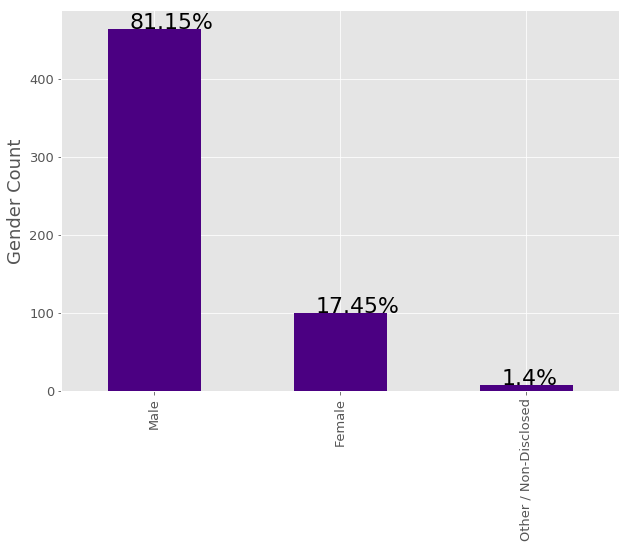

In [6]:
ax2 = df.groupby(['SN', 'Gender']).count().reset_index()['Gender'].value_counts().plot(kind='bar', figsize=(10,7),
                                                  color="indigo", fontsize=13);
ax2.set_alpha(0.8)
ax2.set_ylabel("Gender Count", fontsize=18);
ax2.set_yticks([i for i in range(0,500,100)])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax2.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax2.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax2.text(i.get_x()+.12, i.get_height(), \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=22,
                color='black')

**FEMALE**

In [12]:
df_female = df.loc[df['Gender'] == 'Female']
df_female.head()

,Age,Gender,Item ID,Item Name,Price,SN
7,29,Female,169,"Interrogator, Blood Blade of the Queen",3.32,Iathenudil29
16,22,Female,123,Twilight's Carver,1.14,Sundista85
17,22,Female,59,"Lightning, Etcher of the King",1.65,Aenarap34
22,11,Female,11,Brimstone,2.52,Deural48
29,16,Female,45,Glinting Glass Edge,2.46,Phaedai25


**Purchase Count**

In [31]:
df_female.shape[0]

136

**Total Purchase Value**

In [14]:
total = df_female['Price'].sum()
#'${:.2f}'.format()
total

382.90999999999997

**Normalized Purchase Value**

In [16]:
normalized_total = total/df_female['SN'].nunique()
normalized_total

3.8290999999999995

**Average Purchase Price**

In [27]:
df_female["Price"].mean()

2.815514705882352

**MALE**

In [17]:
df_male = df.loc[df['Gender'] == 'Male']
df_male.head()

,Age,Gender,Item ID,Item Name,Price,SN
0,38,Male,165,Bone Crushing Silver Skewer,3.37,Aelalis34
1,21,Male,119,"Stormbringer, Dark Blade of Ending Misery",2.32,Eolo46
2,34,Male,174,Primitive Blade,2.46,Assastnya25
3,21,Male,92,Final Critic,1.36,Pheusrical25
4,23,Male,63,Stormfury Mace,1.27,Aela59


In [105]:
df_male.shape[0]

633

In [20]:
total_m = df_male['Price'].sum()
total_m

1867.68

In [21]:
normalized_total_m = total_m/df_male['SN'].nunique()
normalized_total_m

4.016516129032258

## Age Demographics1

## Top Spenders

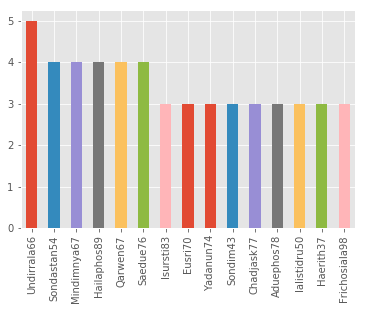

In [7]:
df['SN'].value_counts().head(15).plot.bar();

**Since the value count is the same for the 2nd[1] item and the 6th[5] spenders, I included all of those spenders.**

In [44]:
top_spenders = list(df['SN'].value_counts()[:6].to_dict().keys())

In [52]:
mask_spend = df['SN'].isin(top_spenders)

In [46]:
top_spenders_df = df[mask_spend]

In [49]:
top_spender_purchase_analysis = top_spenders_df.groupby('SN').Price.agg(['count', 'mean', 'sum'])

In [50]:
top_spender_purchase_analysis = top_spender_purchase_analysis.rename(columns={\
            'count': 'Purchase Count', 'mean': 'Ave Purchase Price','sum': 'Total Purchase Value'})
top_spender_purchase_analysis

,Purchase Count,Ave Purchase Price,Total Purchase Value
SN,,,
Hailaphos89,4,1.4675,5.87
Mindimnya67,4,3.1850,12.74
Qarwen67,4,2.4925,9.97
Saedue76,4,3.3900,13.56
Sondastan54,4,2.5600,10.24
Undirrala66,5,3.4120,17.06


## Most Popular Items

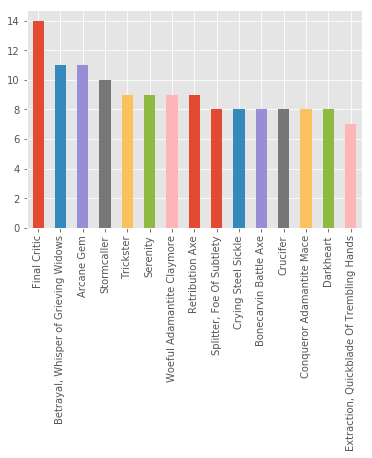

In [33]:
df['Item Name'].value_counts().head(15).plot.bar();

**Since the value count is the same for the 5th item and the 8th items, I included those in top items.**

In [34]:
top_items = list(df['Item Name'].value_counts()[:8].to_dict().keys())


In [35]:
top_items

['Final Critic',
 'Betrayal, Whisper of Grieving Widows',
 'Arcane Gem',
 'Stormcaller',
 'Trickster',
 'Serenity',
 'Woeful Adamantite Claymore',
 'Retribution Axe']

In [36]:
mask = df['Item Name'].isin(top_items)

In [37]:
top_items_df = df[mask]

In [38]:
top_items_df.sort_values(['Item Name']).head()
#TODO should item name be index? how to display top item at the top? 

,Age,Gender,Item ID,Item Name,Price,SN
171,21,Male,84,Arcane Gem,2.23,Stryanastip77
742,26,Male,84,Arcane Gem,2.23,Inguron55
354,20,Male,84,Arcane Gem,2.23,Mindirra92
338,17,Male,84,Arcane Gem,2.23,Lisossanya98
416,25,Male,84,Arcane Gem,2.23,Hiarideu73


list in a table 
-Purchase Count
-Average Purchase Price
-Total Purchase Value

In [64]:
item_purchase_analysis = top_items_df.groupby('Item Name').Price.agg(['count', 'mean', 'sum']).sort_values\
    (by='count', ascending=False)

In [65]:
item_purchase_analysis = item_purchase_analysis.rename(columns={\
            'count': 'Purchase Count', 'mean': 'Ave Purchase Price','sum': 'Total Purchase Value'})
item_purchase_analysis
#sort by purchase count

,Purchase Count,Ave Purchase Price,Total Purchase Value
Item Name,,,
Final Critic,14,2.757143,38.60
Arcane Gem,11,2.230000,24.53
"Betrayal, Whisper of Grieving Widows",11,2.350000,25.85
Stormcaller,10,3.465000,34.65
Retribution Axe,9,4.140000,37.26
Serenity,9,1.490000,13.41
Trickster,9,2.070000,18.63
Woeful Adamantite Claymore,9,1.240000,11.16


## Most Profitable Items

In [53]:
#Identify the 5 most profitable items by total purchase value, then list (in a table): Item ID, Item Name, 
#Purchase Count, Item Price, Total Purchase Value

In [93]:
most_profitable = df.groupby(['Item Name', 'Item ID', 'Price'])['Price'].agg(['sum', 'count']).\
  sort_values(by='sum', ascending=False).nlargest(5, 'sum')
  #could also put 'count' in where 'sum' is

In [96]:
most_profitable = most_profitable.rename(columns={\
            'count': 'Purchase Count', 'sum': 'Total Purchase Value'})
most_profitable

,,,Total Purchase Value,Purchase Count
Item Name,Item ID,Price,,
Retribution Axe,34,4.14,37.26,9
Spectral Diamond Doomblade,115,4.25,29.75,7
Orenmir,32,4.95,29.70,6
Singed Scalpel,103,4.87,29.22,6
"Splitter, Foe Of Subtlety",107,3.61,28.88,8


In [110]:
df['Item ID'].dtype

dtype('int64')

In [115]:
df['Item ID'] = df['Item ID'].apply(str)

In [116]:
df['Item ID'].dtype

dtype('O')

In [117]:
df['Item Name'].dtype

dtype('O')

In [122]:
df['Item'] = df['Item'].astype('|S')

In [123]:
df['Item'] = df[['Item Name', 'Item ID']].apply(lambda x: ''.join(x), axis=0)

In [120]:
df['Item'] = df['Item'].apply(str)

In [124]:
df.head()

,Age,Gender,Item ID,Item Name,Price,SN,Item
0,38,Male,165,Bone Crushing Silver Skewer,3.37,Aelalis34,NaN
1,21,Male,119,"Stormbringer, Dark Blade of Ending Misery",2.32,Eolo46,NaN
2,34,Male,174,Primitive Blade,2.46,Assastnya25,NaN
3,21,Male,92,Final Critic,1.36,Pheusrical25,NaN
4,23,Male,63,Stormfury Mace,1.27,Aela59,NaN
